In [1]:
import os
print(os.getcwd())



C:\Users\shrey\OneDrive\Documents\Disaster-tweets-classification\notebooks


In [2]:
import pandas as pd
import numpy as np
import os


In [3]:
# Construct the path to the CSV file
data_path = os.path.join('..', 'data', 'train.csv')

In [4]:
# Load the dataset into a DataFrame
df = pd.read_csv(data_path)


In [5]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
df.shape

(7613, 5)

In [8]:
# Check for missing values in each column
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [9]:
df.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [10]:
# 1. Check data types
print(df.dtypes)

# 2. Check unique values and distribution of target column
print("\nTarget value counts:")
print(df['target'].value_counts())


id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

Target value counts:
target
0    4342
1    3271
Name: count, dtype: int64


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Make a folder for plots if not already there
import os
os.makedirs('../plots', exist_ok=True)


C:\Users\shrey\AppData\Local\Temp\ipykernel_10124\3375688797.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='viridis')


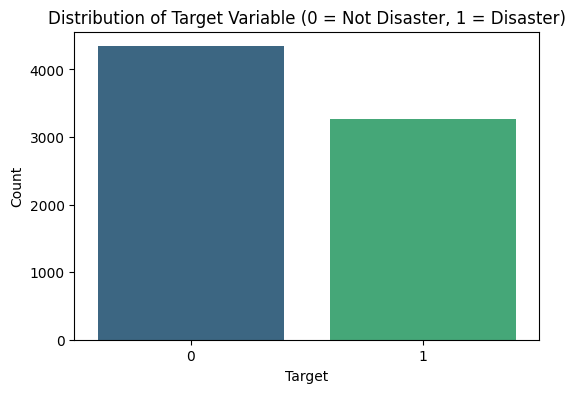

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df, palette='viridis')

plt.title('Distribution of Target Variable (0 = Not Disaster, 1 = Disaster)')
plt.xlabel('Target')
plt.ylabel('Count')

# Save the figure
plt.savefig('../plots/target_distribution.png', bbox_inches='tight', dpi=300)

plt.show()


In [14]:
#basic cleaning
import re

# Make a copy of the original text
df['clean_text'] = df['text'].copy()

# Convert to lowercase
df['clean_text'] = df['clean_text'].str.lower()

# Remove URLs
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'http\S+|www.\S+', '', x))

# Preview cleaned text
df[['text', 'clean_text']].head(3)


,text,clean_text
0,Our Deeds are the Reason of this #earthquake M...,our deeds are the reason of this #earthquake m...
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask. canada
2,All residents asked to 'shelter in place' are ...,all residents asked to 'shelter in place' are ...


In [15]:
## Step 2.1: Further text cleaning - mentions, hashtags, punctuation, etc.
import re
import string

def clean_more(text):
    # Remove @mentions
    text = re.sub(r'@\w+', '', text)
    
    # Remove hashtags symbol but keep the word
    text = re.sub(r'#', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply the function to the already-lowercased column
df['clean_text'] = df['clean_text'].apply(clean_more)

df['clean_text'].head(10)  # optional: peek at cleaned tweets


0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3    people receive wildfires evacuation orders in ...
4    just got sent this photo from ruby alaska as s...
5    rockyfire update california hwy closed in both...
6    flood disaster heavy rain causes flash floodin...
7    im on top of the hill and i can see a fire in ...
8    theres an emergency evacuation happening now i...
9     im afraid that the tornado is coming to our area
Name: clean_text, dtype: object

In [16]:
import nltk

In [17]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
# Get English stopwords set
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from tokenized words
def remove_stopwords(text):
    words = text.split()  # split into words
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Apply to the cleaned text
df['clean_text'] = df['clean_text'].apply(remove_stopwords)

In [19]:
df['clean_text'].head(10)

0         deeds reason earthquake may allah forgive us
1                forest fire near la ronge sask canada
2    residents asked shelter place notified officer...
3    people receive wildfires evacuation orders cal...
4    got sent photo ruby alaska smoke wildfires pou...
5    rockyfire update california hwy closed directi...
6    flood disaster heavy rain causes flash floodin...
7                           im top hill see fire woods
8    theres emergency evacuation happening building...
9                        im afraid tornado coming area
Name: clean_text, dtype: object

In [20]:
import os
os.makedirs("plots", exist_ok=True)


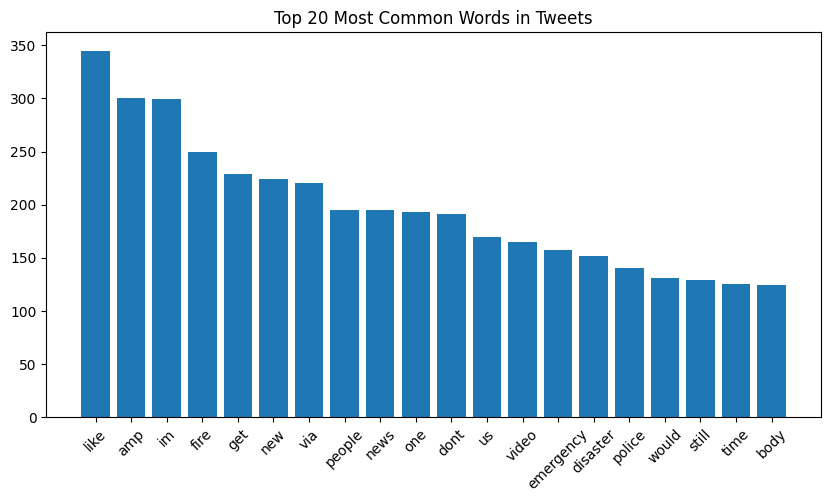

In [21]:
#most common words
from collections import Counter

all_words = ' '.join(df['clean_text']).split()
common_words = Counter(all_words).most_common(20)

words, freqs = zip(*common_words)
plt.figure(figsize=(10,5))
plt.bar(words, freqs)
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words in Tweets")
plt.savefig("plots/common_words_all.png")
plt.show()


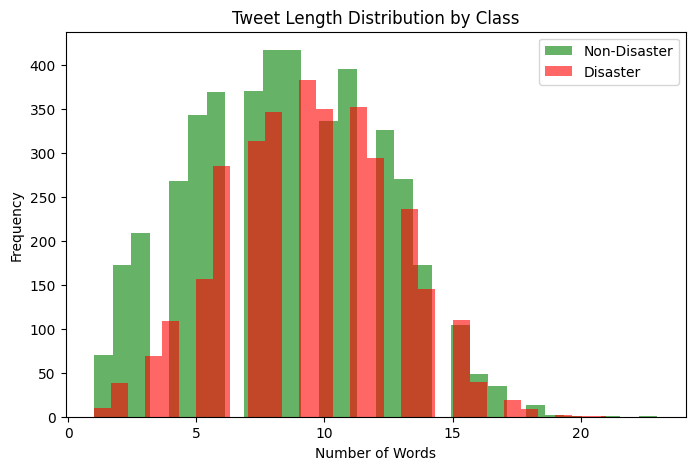

In [22]:
#tweet length dist
df['text_len'] = df['clean_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
df[df['target']==0]['text_len'].plot(kind='hist', bins=30, alpha=0.6, label='Non-Disaster', color='green')
df[df['target']==1]['text_len'].plot(kind='hist', bins=30, alpha=0.6, label='Disaster', color='red')
plt.legend()
plt.title("Tweet Length Distribution by Class")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.savefig("plots/tweet_length_distribution.png")
plt.show()


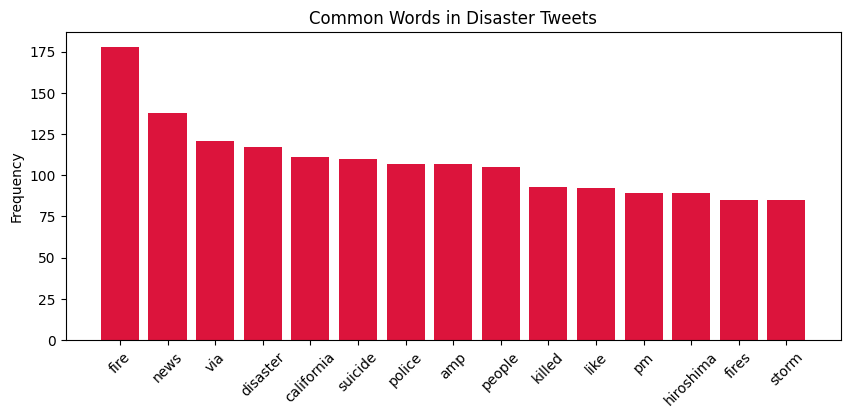

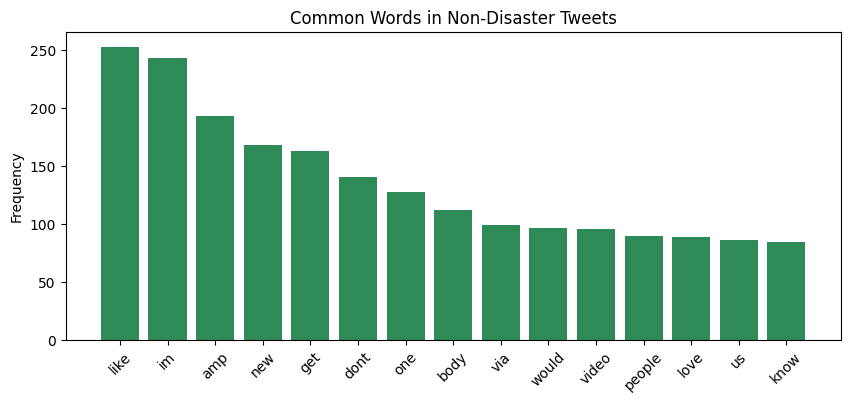

In [23]:
#most common words in each class
disaster_words = ' '.join(df[df['target']==1]['clean_text']).split()
nondisaster_words = ' '.join(df[df['target']==0]['clean_text']).split()

d_common = Counter(disaster_words).most_common(15)
nd_common = Counter(nondisaster_words).most_common(15)

# Disaster
plt.figure(figsize=(10,4))
plt.bar(*zip(*d_common), color='crimson')
plt.title("Common Words in Disaster Tweets")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.savefig("plots/common_disaster_words.png")
plt.show()

# Non-disaster
plt.figure(figsize=(10,4))
plt.bar(*zip(*nd_common), color='seagreen')
plt.title("Common Words in Non-Disaster Tweets")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.savefig("plots/common_non_disaster_words.png")
plt.show()


In [24]:
!pip install wordcloud

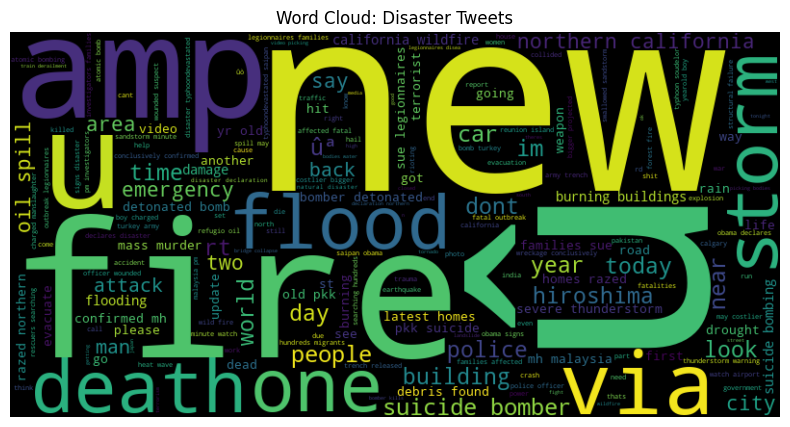

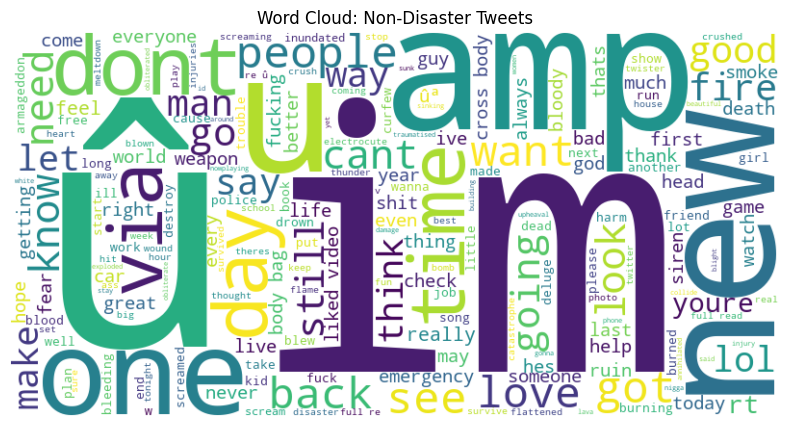

In [25]:
from wordcloud import WordCloud

# Disaster Tweets
disaster_text = ' '.join(df[df['target']==1]['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(disaster_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud: Disaster Tweets")
plt.savefig("plots/wordcloud_disaster.png")
plt.show()

# Non-Disaster Tweets
nondisaster_text = ' '.join(df[df['target']==0]['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(nondisaster_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud: Non-Disaster Tweets")
plt.savefig("plots/wordcloud_non_disaster.png")
plt.show()


In [26]:
!pip install textblob


In [27]:
from textblob import TextBlob


In [28]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity


In [29]:
df['polarity'] = df['clean_text'].apply(get_polarity)
df['subjectivity'] = df['clean_text'].apply(get_subjectivity)


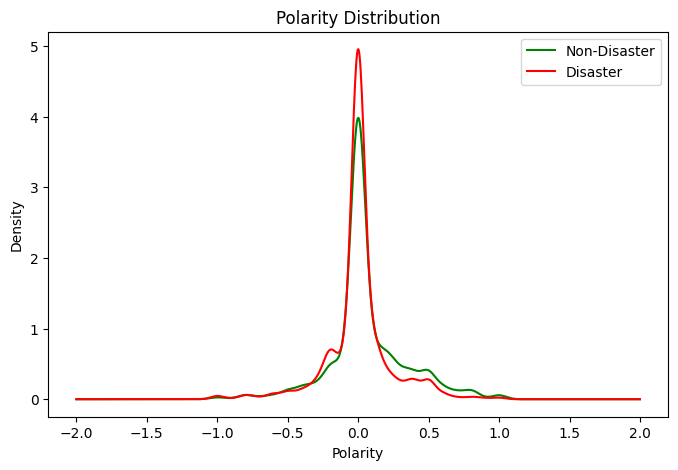

In [30]:
plt.figure(figsize=(8,5))
df[df['target']==0]['polarity'].plot(kind='kde', label='Non-Disaster', color='green')
df[df['target']==1]['polarity'].plot(kind='kde', label='Disaster', color='red')
plt.title("Polarity Distribution")
plt.xlabel("Polarity")
plt.legend()
plt.savefig("plots/polarity_distribution.png")
plt.show()


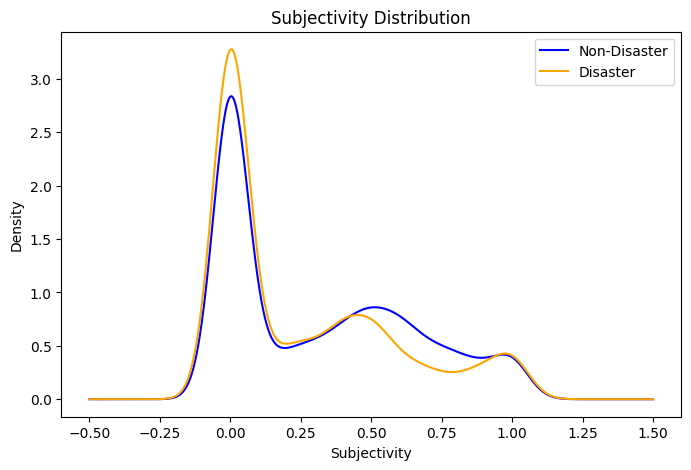

In [31]:
plt.figure(figsize=(8,5))
df[df['target']==0]['subjectivity'].plot(kind='kde', label='Non-Disaster', color='blue')
df[df['target']==1]['subjectivity'].plot(kind='kde', label='Disaster', color='orange')
plt.title("Subjectivity Distribution")
plt.xlabel("Subjectivity")
plt.legend()
plt.savefig("plots/subjectivity_distribution.png")
plt.show()


In [32]:
#step 3.0: vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)  # keep top 5000 words


In [33]:
X = tfidf.fit_transform(df['clean_text'])


In [34]:
y = df['target']


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF
tfidf = TfidfVectorizer(max_features=5000)

# Vectorize clean text
X = tfidf.fit_transform(df['clean_text'])

# Define the target
y = df['target']


In [36]:
#TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split


In [37]:
# Vectorized features and labels
X = tfidf.fit_transform(df['clean_text'])
y = df['target']


In [38]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y,
    test_size=0.2,         # 20% for validation
    random_state=42,       # so results are reproducible
    stratify=y             # keeps 0s and 1s balanced
)


In [39]:
print("Train shape:", X_train.shape)
print("Validation shape:", X_valid.shape)


Train shape: (6090, 5000)
Validation shape: (1523, 5000)


In [40]:
#Training the model
!pip install xgboost


In [41]:
import xgboost as xgb


In [42]:
model = xgb.XGBClassifier(
    objective='binary:logistic',  # binary classification problem
    eval_metric='logloss',        # metric to evaluate      
    random_state=42
)


In [43]:
model.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [44]:
y_pred = model.predict(X_valid)


In [45]:
y_proba = model.predict_proba(X_valid)[:, 1]  # probability of class 1


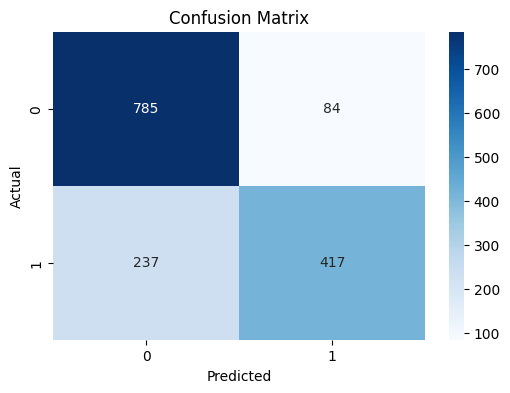

In [46]:
#evaluation of model

#step1- confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_valid, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("plots/confusion_matrix.png")
plt.show()


In [47]:
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_valid, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       869
           1       0.83      0.64      0.72       654

    accuracy                           0.79      1523
   macro avg       0.80      0.77      0.78      1523
weighted avg       0.80      0.79      0.78      1523



In [48]:
from sklearn.metrics import roc_auc_score

roc_score = roc_auc_score(y_valid, y_proba)
print("ROC AUC Score:", roc_score)


ROC AUC Score: 0.8392938208000337


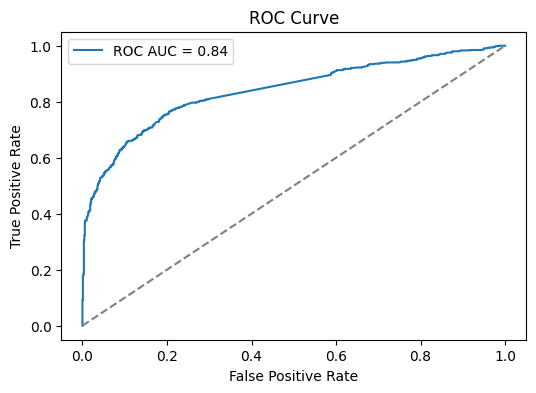

In [49]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_valid, y_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.savefig("plots/roc_curve.png")
plt.show()


In [50]:
#threhold tuning
y_proba = model.predict_proba(X_valid)[:, 1]


In [51]:
import numpy as np

# Try a threshold of 0.3
custom_threshold = 0.3
y_pred_custom = (y_proba > custom_threshold).astype(int)


Classification Report (Threshold = 0.3):
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       869
           1       0.67      0.81      0.73       654

    accuracy                           0.75      1523
   macro avg       0.75      0.76      0.75      1523
weighted avg       0.76      0.75      0.75      1523



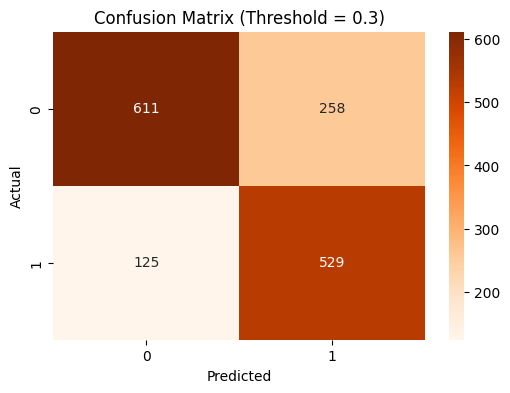

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Classification Report (Threshold = 0.3):")
print(classification_report(y_valid, y_pred_custom))

# Plot confusion matrix
cm = confusion_matrix(y_valid, y_pred_custom)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (Threshold = {custom_threshold})")
plt.savefig(f"plots/confusion_matrix_threshold_{int(custom_threshold*100)}.png")
plt.show()


In [53]:
#hyperparameter tuning

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


In [54]:
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}


In [55]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1',
    cv=3,  # 3-fold cross validation
    verbose=1,
    n_jobs=-1  # Use all cores
)


In [56]:
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\shrey\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:31:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


In [57]:
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_valid)

# Evaluate
from sklearn.metrics import classification_report
print("Best Tuned Model Performance:")
print(classification_report(y_valid, y_pred_best))


Best Tuned Model Performance:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       869
           1       0.83      0.63      0.72       654

    accuracy                           0.79      1523
   macro avg       0.80      0.77      0.77      1523
weighted avg       0.79      0.79      0.78      1523



In [58]:
import pickle

with open("xgboost_model.pkl", "wb") as f:
    pickle.dump(best_model, f)


In [59]:
#step 5: test set prediction
test_df = pd.read_csv("../data/test.csv")

# Apply same text cleaning pipeline
test_df['text'] = test_df['text'].str.lower()
test_df['text'] = test_df['text'].apply(lambda x: re.sub(r"http\S+|www\S+|https\S+", '', x, flags=re.MULTILINE))
test_df['text'] = test_df['text'].apply(lambda x: re.sub(r'\@w+|\#','', x))
test_df['text'] = test_df['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
test_df['text'] = test_df['text'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

# Remove stopwords
test_df['text'] = test_df['text'].apply(remove_stopwords)


In [60]:
# Load the test data
test_df = pd.read_csv("../data/test.csv")

# If you used 'text' column for training, apply same cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@w+|\#','', text)  # Remove @ and # mentions
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Remove punctuation
    return text

# Apply cleaning
test_df['clean_text'] = test_df['text'].apply(clean_text)


In [61]:
# Reuse your stopwords function
test_df['clean_text'] = test_df['clean_text'].apply(remove_stopwords)


In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train = tfidf_vectorizer.fit_transform(df['clean_text'])


In [63]:
X_test = tfidf_vectorizer.transform(test_df['clean_text'])


In [64]:
#predict on test set
# Predict using the best model
test_preds = best_model.predict(X_test)


In [65]:
import os
os.chdir("C:/Users/shrey/OneDrive/Documents/Disaster-tweets-classification")


In [66]:
import os
print(os.getcwd())


C:\Users\shrey\OneDrive\Documents\Disaster-tweets-classification


In [67]:
# Load the sample submission
submission_df = pd.read_csv("data/sample_submission.csv")

# Assign predictions to the target column
submission_df['target'] = test_preds

# Save the submission file
submission_df.to_csv("submission.csv", index=False)


In [68]:
import pickle

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)
